# **Gaussian filter**

### *Definition*

A Gaussian filter is a type of digital image processing filter that is commonly used to
reduce noise and smooth out images. It is popular for its simplicity, effectiveness, and
ability to preserve image details while reducing noise. It operates by convolving an
image with a Gaussian function, which represents a bell-shaped curve that smoothly
decreases as it moves away from the central point.

### *How the algorithm works?*

The algorithm is conducted by sliding the Gaussian kernel over the image, the
kernel being the mathematical function that describes the curve with bell-like shape.
Implementation involves scanning through each pixel using a smaller rectangular window, that is kernel, which let the authors manipulate the image. 

The size of the kernel should be odd, for instance, 3×3, 5×5 or 7×7, such that there is
a single and central element within the neighborhood. For every pixel, the filter computes
the weighted average of the pixel intensities in the unit, which weights are predefined to
be the values of Gaussian function at the given pixel position.

### *Advantages of the algorithm*

The purpose of the Gaussian filter lies in the fact that it is designed to smooth an
image by cutting edges and minute detail.

At the same time, it saves some information on the edges of the object in the image.
This filter gets this done by contributing more the pixels that are closer to the center
of the kernel, as at the center of the Gaussian function the pixels have higher values, in
contrast contributing less weight to the pixels that are further away from the center.

### *Mathematical representation*

$$G(x, y, \sigma)=\frac{1}{2\pi\sigma^2}exp^{(-\frac{x^2+y^2}{2\sigma^2})}$$

Where:
1. $\sigma$ is a scale, which is a scaling factor that decides the area of smoothing;
2. $x, y$ is the distance from origin (center) in horizontal / vertical direction

<div style="text-align:center;">
    <img src="gaussian.png" alt="Example Image" width="500">
</div>

### *Implementation*

### **Step 1:** import libraries and load an image

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
# import cv
import cv2 as cv

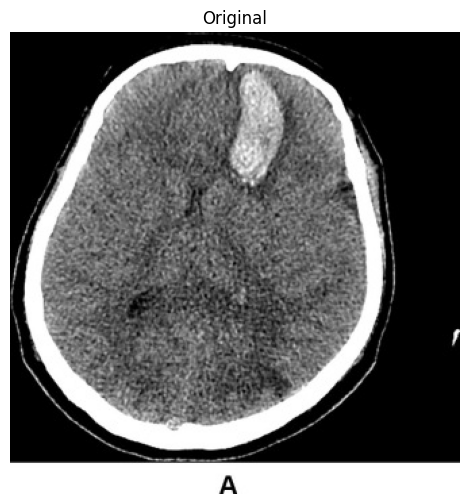

In [3]:
photo = cv.imread('image.jpg')

plt.figure(figsize=(8, 6))
plt.imshow(photo)
plt.title('Original')
plt.axis('off') 
plt.show()

### **Step 2**: implement an algorithm using built-in functions

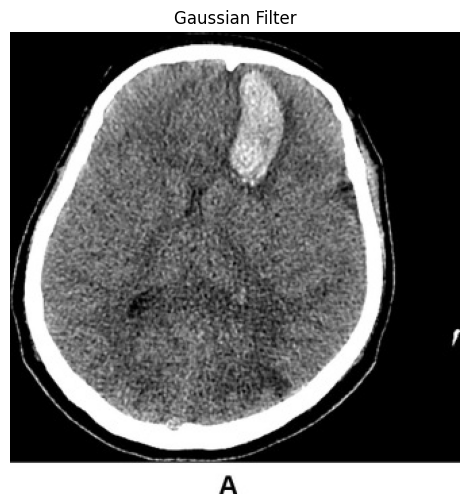

In [4]:
# Built-in function

gaussian = cv.GaussianBlur(photo, (3, 3), 0)

plt.figure(figsize=(8, 6))
plt.imshow(photo)
plt.title('Gaussian Filter')
plt.axis('off') 
plt.show()


### **Step 3:** implement an algorithm manually

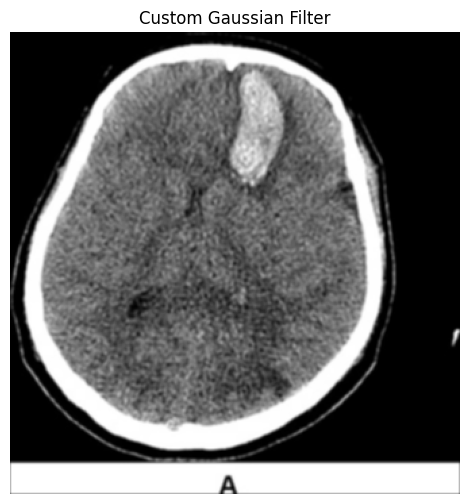

In [5]:
# Custom Gaussian Filter

def gaussian_filter(photo, kernel_size, sigma):
    
    # Create Gaussian kernel
    kernel = np.fromfunction(lambda x, y: (1/(2*np.pi*sigma**2)) * np.exp(-((x-(kernel_size[0]-1)/2)**2 + (y-(kernel_size[1]-1)/2)**2) / (2*sigma**2)), kernel_size)
    kernel = kernel / np.sum(kernel)  # Normalize the kernel

    # Apply filter
    filtered_image = np.zeros_like(photo, dtype=float)
    padding = [(k // 2) for k in kernel_size]
    padded_image = np.pad(photo, ((padding[0], padding[0]), (padding[1], padding[1])), mode='constant')

    for i in range(photo.shape[0]):
        for j in range(photo.shape[1]):
            filtered_image[i, j] = np.sum(padded_image[i:i+kernel_size[0], j:j+kernel_size[1]] * kernel)

    return np.uint8(filtered_image)

# Load the image
photo = cv.imread('image.jpg', cv.IMREAD_GRAYSCALE)

# Define Gaussian parameters
kernel_size = (3, 3)
sigma = 1.0

blurred_image_custom = gaussian_filter(photo, kernel_size, sigma)

plt.figure(figsize=(8, 6))
plt.imshow(blurred_image_custom, cmap='gray')
plt.title('Custom Gaussian Filter')
plt.axis('off') 
plt.show()